In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import numpy as np
from skimage import io
from IPython import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

In [15]:
sample_submission_url = 'https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/Challenge1/datasets/sample_submission.csv'
test_nolabel_url= "https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/Challenge1/datasets/test_nolabel.csv/test_nolabel.csv"
train_url = 'https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/Challenge1/datasets/train.csv/train.csv'

sample_submission = pd.read_csv(sample_submission_url)
test_nolabel = pd.read_csv(test_nolabel_url)
df = pd.read_csv(train_url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


__Problem:__ a partir de data de banques variées sur des prets acceptés ou non à des entreprises, prédire si un pret va etre accepté par la banque ou non ?
20 attributs differents, 1 variable objectif(class/label): Accept (0=NO, 1=YES)

In [2]:
df = pd.read_csv('loan-approval-prediction-new-york/train.csv')
df.head()

FileNotFoundError: ignored

In [16]:
def gross_extract(word):  #to remove the '$'sign 
    return word.split('$')[1].split(',')[0]

df['Disb Gross'] = df['DisbursementGross'].apply(gross_extract)
df['Balance Gross'] = df['BalanceGross'].apply(gross_extract)
df.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept,Disb Gross,Balance Gross
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1,350,0.00
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1,35,0.00
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1,50,0.00
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1,190,0.00
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1,30,0.00


In [5]:
print(df.columns, 'shape : ' , df.shape)#les 21 attributs

Index(['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState',
       'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'Accept',
       'Disb Gross', 'Balance Gross'],
      dtype='object') shape :  (40385, 23)


In [17]:
df.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.038500e+04,40385.000000,40378.000000,40385.000000,40385.000000,40385.000000,40385.00000,40385.000000
mean,4.459565e+09,9.485750,1.279013,4.273666,7.128191,1218.894342,0.76885,0.796360
std,2.539048e+09,54.872591,0.451107,151.989529,152.156119,8647.991363,0.59020,0.402709
min,1.000655e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.276314e+09,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,3.804294e+09,4.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
75%,6.409913e+09,9.000000,2.000000,1.000000,5.000000,1.000000,1.00000,1.000000
max,9.995413e+09,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.00000,1.000000


# Graph visualization
Too see 'Accept' proportion in function of each parameter 

In [ ]:
#df.hist(figsize=(10,10))
#plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f062e637810>,
      dtype=object)

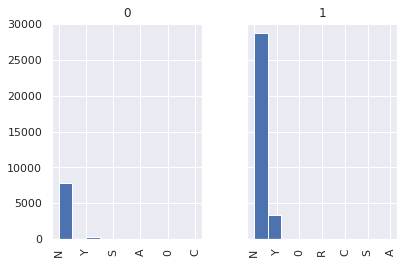

In [7]:
df.hist(column='LowDoc', by='Accept', sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f062e49af50>,
      dtype=object)

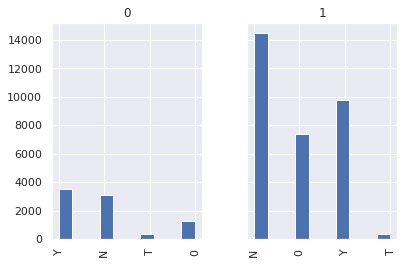

In [8]:
df.hist(column='RevLineCr', by='Accept', sharey=True)

In [ ]:
#df.hist(column='UrbanRural', by='Accept', sharey=True)

In [ ]:
#sns.barplot(x='LowDoc', y='Accept', data=df) # LowDoc Loan Program: Y = Yes, N = No

In [ ]:
#sns.barplot(x='NewExist', y='Accept', data=df)

In [ ]:
#sns.barplot(x='RevLineCr', y='Accept', data=df) # Revolving line of credit: Y = Yes, N = No

In [ ]:
#sns.barplot(x='UrbanRural', y='Accept', data=df) # 1 = Urban, 2 = rural, 0 = undefined

In [ ]:
#sns.barplot(x='BankState', y='Accept', data=df)

In [ ]:
#df.groupby('CreateJob').Accept.mean().plot()

In [ ]:
#df.groupby('RetainedJob').Accept.mean().plot()

# Parameter analysis and Processing 
To know the possible values for the parameters and their numbers. Remove nan and assign most common value. Convert some character into 0 and 1 : 

In [18]:
print(df['City'].unique()) #bcp de villes (2552), non utilisable ?
df['City'].unique().shape

['BROOKLYN' 'HARTWICK' 'BROOKLYN (BOROUGH OF NEW YORK)' ... 'OCEQNSIDE'
 'LITTLE YORK' 'ELLERY']


(2552,)

In [19]:
df['State'].unique().shape #todos son de NY, unrelevant feature

(1,)

In [ ]:
df['LowDoc'].unique() # pas que des yes ou no , que veut dire R ? C ? 

array(['N', 'Y', nan, '0', 'R', 'C', 'S', 'A'], dtype=object)

In [ ]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan], dtype=object)

__Value binarization for param LowDoc__

In [ ]:
df.loc[df["LowDoc"] == "N", "LowDoc"] = 0
df.loc[df["LowDoc"] == "Y", "LowDoc"] = 1
df.loc[df["LowDoc"] == "0", "LowDoc"] = 0
df.loc[df["LowDoc"] == "R", "LowDoc"] = 1
df.loc[df["LowDoc"] == "C", "LowDoc"] = 1
df.loc[df["LowDoc"] == "S", "LowDoc"] = 1
df.loc[df["LowDoc"] == "A", "LowDoc"] = 1
df['LowDoc'].fillna(1, inplace=True) 
#what to do with  R C S A & nan ? assign 0 to all of them ? or 1 ? create a third class ?

In [ ]:
df['LowDoc'].unique()

array([0, 1])

__Value binarization for param RevLineCr__

In [ ]:
df.loc[df["RevLineCr"] == "N", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "Y", "RevLineCr"] = 1
df.loc[df["RevLineCr"] == "0", "RevLineCr"] = 1
df.loc[df["RevLineCr"] == "T", "RevLineCr"] = 1
df['RevLineCr'].fillna(1, inplace=True) 

In [ ]:
df['RevLineCr'].unique()

array([0, 1])

In [20]:
df.loc[df["ApprovalFY"] == "1976A", "ApprovalFY"] = 1976

__Numerization of param 'Bank' and 'Bankstate'__

In [25]:
df['Bank']

0        JPMORGAN CHASE BANK NATL ASSOC
1              CITIZENS BANK NATL ASSOC
2        JPMORGAN CHASE BANK NATL ASSOC
3         MANUFACTURERS & TRADERS TR CO
4         MANUFACTURERS & TRADERS TR CO
                      ...              
40380         COMMUNITY BANK NATL ASSOC
40381                  EH NATIONAL BANK
40382            HSBC BK USA NATL ASSOC
40383            HSBC BK USA NATL ASSOC
40384    JPMORGAN CHASE BANK NATL ASSOC
Name: Bank, Length: 40385, dtype: object

In [26]:
#!/usr/bin/env python
# -*- coding: utf-8 -*- 

for i in range(0, 312): #we assign an int to identify each bank
    df.loc[df["Bank"] == 'index[i]' , "Bank"] = i 
#df.head()
df['Bank'].fillna(312, inplace=True)
df['Bank'].unique()

array(['JPMORGAN CHASE BANK NATL ASSOC', 'CITIZENS BANK NATL ASSOC',
       'MANUFACTURERS & TRADERS TR CO', 'CELTIC BANK CORPORATION',
       'COMMUNITY BANK NATL ASSOC', 'WELLS FARGO BANK NATL ASSOC',
       'FIRST NIAGARA BANK NATL ASSOC', 'FLUSHING BANK', 'CITIBANK, N.A.',
       'SOLVAY BANK', 'THE ONEIDA SAVINGS BANK',
       'BANK OF AMERICA NATL ASSOC', 'LOMTO FCU',
       'BANCO POPULAR NORTH AMERICA', 'HSBC BK USA NATL ASSOC',
       'KEYBANK NATIONAL ASSOCIATION', 'MELROSE CU', 'ADIRONDACK BANK',
       'CHEMUNG CANAL TRUST COMPANY', 'BBCN BANK',
       'LONG ISLAND DEVEL CORP', 'EMPIRE ST. CERT. DEVEL CORP',
       'NATL BK OF DELAWARE COUNTY WA', 'THE ADIRONDACK TRUST COMPANY',
       'TD BANK, NATIONAL ASSOCIATION', 'FEDERAL DEPOSIT INSUR CORP',
       'MONROE CNTY INDUST DEVEL CORP', 'CAPITAL ONE NATL ASSOC',
       'VALLEY NATIONAL BANK', 'MERCANTIL COMMERCEBANK NATL AS',
       'FIVE STAR BANK', 'UNITY BANK', 'FIRST WESTERN SBLC, INC',
       'TOMPKINS TRUST COMPANY', 

In [28]:
df['BankState'].fillna('NY', inplace=True)
index_S = df["BankState"].unique() #we assign an int to identify each bank state
for i in range (0, 37):
    
    df.loc[df["BankState"] == index_S[i] , "BankState"] = i
#df.head()
df['BankState'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [35]:
df['Bank'].fillna('NY', inplace=True)
index_S = df["Bank"].unique() #we assign an int to identify each bank 
for i in range (0, 312):
    
    df.loc[df["Bank"] == index_S[i] , "Bank"] = i
#df.head()
df['Bank'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 20

In [34]:
len(df['Bank'].unique())

312

In [11]:
df['NewExist'].fillna(2, inplace=True)  #replaced NaN by 2 but maybe 0 or 1 can be better ?
df['NewExist'].unique()

array([1., 2., 0.])

In [12]:
df['Balance Gross'].unique() #irrelevant feature ? , always 0 in the training

array(['0.00 '], dtype=object)

# Different algorithm and their accuracy with some parameters 

In [ ]:
from sklearn.model_selection import train_test_split
features = ['BankState', 'Bank', 'NoEmp', 'NewExist','CreateJob', 'RetainedJob', 'Disb Gross', 'ApprovalFY']
X = df[features].values
y = df['Accept'].values 
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=33, stratify=y) #75% training 25%test
scaler = preprocessing.StandardScaler().fit(X_train) #preprocess : standardize/normalize
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dec_tree = decision_tree.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
print('Confusion matrix for decision tree : \n', metrics.confusion_matrix(y_test, Y_pred_dec_tree))
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(decision_tree.score(X_train, y_train)))
print("Exactitud del conjunto de test: {:.3f}".format(decision_tree.score(X_test, y_test)))

Confusion matrix for decision tree : 
 [[ 1977  2135]
 [ 2515 13566]]
Exactitud del conjunto de entrenamiento: 0.986
Exactitud del conjunto de test: 0.770


In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred_perceptron = perceptron.predict(X_test)
from sklearn.metrics import plot_confusion_matrix 
print('Confusion matrix for perceptron model : \n', metrics.confusion_matrix(y_test, Y_pred_perceptron))
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(perceptron.score(X_train, y_train)))
print("Exactitud del conjunto de test: {:.3f}".format(perceptron.score(X_test, y_test)))

Confusion matrix for perceptron model : 
 [[  314  3798]
 [ 3522 12559]]
Exactitud del conjunto de entrenamiento: 0.648
Exactitud del conjunto de test: 0.637


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rdm_forest = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
print('Confusion matrix for random forest classifier : \n', metrics.confusion_matrix(y_test, Y_pred_rdm_forest))
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(random_forest.score(X_train, y_train)))
print("Exactitud del conjunto de test: {:.3f}".format(random_forest.score(X_test, y_test)))

Confusion matrix for random forest classifier : 
 [[ 1723  2389]
 [ 1113 14968]]
Exactitud del conjunto de entrenamiento: 0.986
Exactitud del conjunto de test: 0.827


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)
print('Confusion matrix for random forest classifier : \n', metrics.confusion_matrix(y_test, y_pred_NB))
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(clf_NB.score(X_train, y_train)))
print("Exactitud del conjunto de test: {:.3f}".format(clf_NB.score(X_test, y_test)))

Confusion matrix for random forest classifier : 
 [[  561  3551]
 [  515 15566]]
Exactitud del conjunto de entrenamiento: 0.799
Exactitud del conjunto de test: 0.799


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=3000,activation = 'tanh',solver='adam',random_state=1, hidden_layer_sizes=(5,3)) 
mlp.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(mlp.score(X_train, y_train)))
y_pred_mlp = mlp.predict(X_test)
print("Exactitud del conjunto de test: {:.3f}".format(mlp.score(X_test, y_test)))
print('Confusion matrix for random forest classifier : \n', metrics.confusion_matrix(y_test, y_pred_mlp))

Exactitud del conjunto de entrenamiento: 0.818
Exactitud del conjunto de test: 0.813
Confusion matrix for random forest classifier : 
 [[ 1097  3015]
 [  761 15320]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(clf.score(X_train, y_train)))
y_pred_clf = clf.predict(X_test)
print("Exactitud del conjunto de test: {:.3f}".format(clf.score(X_test, y_test)))
print('Confusion matrix for random forest classifier : \n', metrics.confusion_matrix(y_test, y_pred_clf))

Exactitud del conjunto de entrenamiento: 0.844
Exactitud del conjunto de test: 0.842
Confusion matrix for random forest classifier : 
 [[ 1456  2656]
 [  536 15545]]
